In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\ML\\covid_toy.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
lb=LabelEncoder()

In [5]:
df['gender'] = lb.fit_transform(df['gender'])
df['cough'] = lb.fit_transform(df['cough'])
df['city'] = lb.fit_transform(df['city'])
df['has_covid'] = lb.fit_transform(df['has_covid'])

In [6]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1
2,42,1,101.0,0,1,0
3,31,0,98.0,0,2,0
4,65,0,101.0,0,3,0


In [7]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score

In [11]:
x=df.drop(columns =['has_covid'],axis=1)
y=df['has_covid']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [16]:
logistic_model = LogisticRegression()

In [17]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [18]:
x_pred=logistic_model.predict(x_test)
accuracy_score(y_test,x_pred)

0.4444444444444444

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, x_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4444444444444444


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, x_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5555555555555556


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)

In [22]:
estimator_values =[10, 50, 100, 200, 500]

In [23]:
for n_estimators in estimator_values:
    rf_classifier=RandomForestClassifier(n_estimators=n_estimators,random_state=42)
    scores=cross_val_score(rf_classifier, x_train,y_train, cv=5)
    mean_accuracy =np.mean(scores)
    print(f"No. of estimators: {n_estimators}, Mean accuracy:  {mean_accuracy}")

No. of estimators: 10, Mean accuracy:  0.5428571428571429
No. of estimators: 50, Mean accuracy:  0.5419047619047619
No. of estimators: 100, Mean accuracy:  0.5552380952380952
No. of estimators: 200, Mean accuracy:  0.5552380952380952
No. of estimators: 500, Mean accuracy:  0.5685714285714286


In [24]:
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)

In [25]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred =rf_classifier.predict(x_test)

In [27]:
accuracy =accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.4444444444444444


In [28]:
from sklearn.datasets import make_regression 

In [29]:
x_train,y_train = make_regression(n_samples = 100 , n_features = 1 , n_informative = 1 , n_targets = 1 , noise = 80, random_state= 13) 

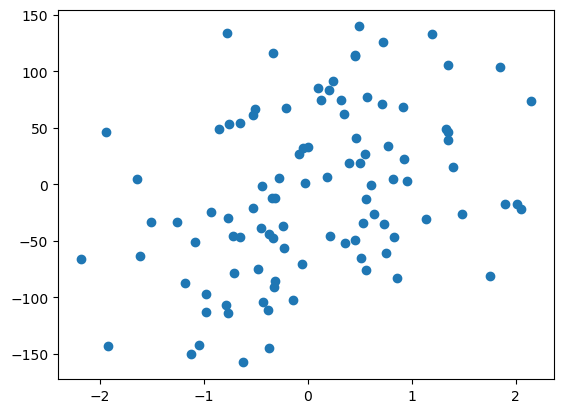

In [30]:
import matplotlib.pyplot as plt 
plt.scatter(x_train,y_train)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression() 
reg.fit(x,y) 

LinearRegression()

In [33]:
LinearRegression( fit_intercept = True , n_jobs = None)

LinearRegression()

In [34]:
reg.coef_

array([-0.001141  ,  0.06448674, -0.0507286 , -0.15588997,  0.01829835])

In [35]:
reg.intercept_

5.594610987667633

ValueError: x and y must be the same size

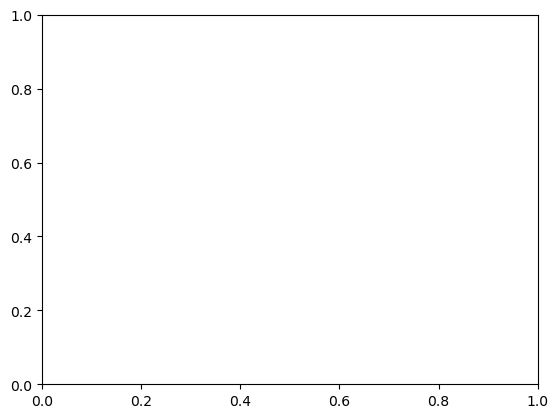

In [36]:
plt.scatter(x,y) 
plt.plot(x, reg.predict(x) , color = 'red')

In [38]:
y_pred = ((78.35*x)+0) #y = m*x+b

ValueError: x and y must be the same size

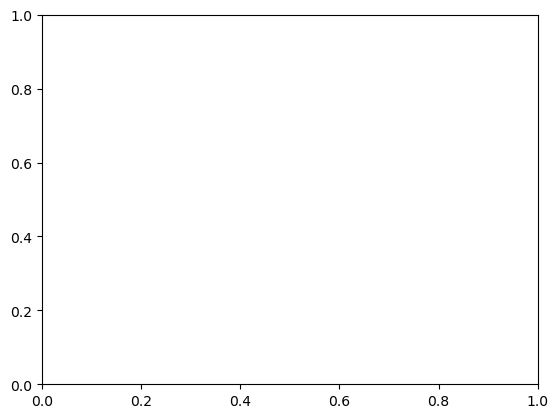

In [39]:
plt.scatter(x,y) 
plt.plot(x , reg.predict(x) , color = 'red' , label = 'OLS')
plt.plot(x,y_pred , color = "green" , label = 'b = 0')
plt.legend() 
plt.show() 

In [40]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.model_selection import train_test_split 
x_train , x_test  ,y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

In [43]:
lr = LinearRegression() 

In [45]:
lr.fit(x_train,y_train) 
print(lr.coef_) 
print(lr.intercept_) 

[-0.00112768  0.129603   -0.04604327 -0.06045455 -0.00517158]
5.086193902121833


In [47]:
y_pred = lr.predict(x_test) 
from sklearn.metrics import r2_score 
r2_score(y_test , y_pred) 

0.029275904569333377

In [48]:
class GDRegressor : 
    
    def __init__(self , learning_rate , epochs):
        self.m = 100   # we can start any number as like m = 0 
        self.b = -120  # we can start any number as like b = 1 
        self.lr = learning_rate 
        self.epochs = epochs 
        
    def fit(self , x,y):
        #Calculate the b using GD 
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y - self.m*x.ravel() - self.b)
            loss_slope_m = -2*np.sum((y - self.m*x.ravel() - self.b)*x.ravel())  
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m) 
        print(self.b , self.m)  
        
    def predict(self , x):
        return self.m * x + self.b 

In [49]:
gd = GDRegressor(0.001 , 100)

In [52]:
gd.fit(x_train,y_train) 

AttributeError: 'DataFrame' object has no attribute 'ravel'

NameError: name 'arr' is not defined